In [1]:
# import necessary library
import pandas as pd
import math
import numpy as np
from datetime import datetime
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\Md Mintu Miah\anaconda3\envs\geo_env\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.11.0-CAPI-1.17.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


# Helper Function

In [2]:
# define a function to get the week number
def get_week_in_month(df, date_column):
    df["day"] = df[date_column].dt.day

    df["week_of_month"] = df["day"].apply(lambda x: math.ceil(x / 7))

    #del df["day"]

    return df

In [3]:
# import static variable
static_var=pd.read_csv('H:/Desktop/AT Census/D12Analysis/Static_data_circular_0.5_mile_buffer.csv')
static_var['distanc_sch_coll_uni'] = static_var[[ 'min_dist_to_school', 'min_dist_to_college', 'min_dist_to_university']].min(axis=1)
static_var.rename(columns={'Distance to water area': 'Distance_to_water_area'}, inplace=True)
static_var=static_var.loc[static_var['bike_true']==1]
static_var.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,Distance_to_water_area,park Area,Distance to Park Center,School,min_dist_to_school,college,min_dist_to_college,University,min_dist_to_university,distanc_sch_coll_uni
0,100002694,,['bicycle' 'pedestrian'],OC Parks,LIWH: Borrego Trail,33.683254,-117.66208,1,1,12,...,0.830152,0.013633,0.192821,1,0.095495,0,6.641928,0,8.828075,0.095495
1,100002695,,['bicycle' 'pedestrian'],OC Parks,LIWH: Serrano Trail (Gate 5),33.672590,-117.65186,1,1,12,...,0.546286,0.020469,0.393814,0,0.859881,0,7.219121,0,9.272793,0.859881
2,100002696,X2H21045761,['bicycle' 'horse' 'pedestrian'],OC Parks,Bellview / Dove Canyon,33.636400,-117.57360,1,1,12,...,0.445287,0.008840,0.066812,0,0.632868,0,7.911967,0,10.905523,0.632868
3,100002697,,['bicycle' 'horse' 'pedestrian'],OC Parks,OC_04 [X2311101558],33.866030,-117.71625,1,1,12,...,0.381162,0.000000,0.691497,0,0.726372,0,5.653016,0,9.349656,0.726372
4,100002698,,['bicycle' 'horse' 'pedestrian'],OC Parks,Santiago Creek Trail / Irvine Park [X2311101559],33.802960,-117.76664,1,1,12,...,0.240756,0.139318,0.437461,0,0.900400,0,0.514099,0,5.025631,0.514099


In [ ]:
static_var.shape

In [ ]:
# Import eco hourly volume after QA/Qc
eco_hr_vol=pd.read_csv('H:/Desktop/AT Census/D12Analysis/hourly-bike-eco-2019-2022.csv')
eco_hr_vol.head()

In [6]:
# collapse the date column
eco_hr_vol[[ "Date","time_zone"]] = eco_hr_vol["date"].str.split(" ", expand = True)
eco_hr_vol['Date'] = pd.to_datetime(eco_hr_vol['Date'], errors='coerce')
eco_hr_vol.head()

,Unnamed: 0,id,site_name,date,counts,Date,time_zone
0,0,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 00:00:00+00:00,4.0,2019-01-01,00:00:00+00:00
1,1,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 01:00:00+00:00,6.0,2019-01-01,01:00:00+00:00
2,2,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 02:00:00+00:00,9.0,2019-01-01,02:00:00+00:00
3,3,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 03:00:00+00:00,2.0,2019-01-01,03:00:00+00:00
4,4,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 04:00:00+00:00,2.0,2019-01-01,04:00:00+00:00


In [7]:
# Make a date from year, month and day; then calculate the number of days in that particular month
# cols=["year","month","day"]
# eco_hr_vol['Date'] = eco_hr_vol[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
# eco_hr_vol['Date'] = pd.to_datetime(eco_hr_vol['Date'], errors='coerce')
eco_hr_vol['month'] = eco_hr_vol['Date'].dt.month
eco_hr_vol['year'] = eco_hr_vol['Date'].dt.year
eco_hr_vol['day'] = eco_hr_vol['Date'].dt.day
eco_hr_vol['days_in_month'] = eco_hr_vol['Date'].dt.days_in_month
eco_hr_vol['weekno']=eco_hr_vol['Date'].dt.week
eco_hr_vol['dayofweek'] = eco_hr_vol['Date'].dt.dayofweek
eco_hr_vol.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_13944\1510869477.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  eco_hr_vol['weekno']=eco_hr_vol['Date'].dt.week


,Unnamed: 0,id,site_name,date,counts,Date,time_zone,month,year,day,days_in_month,weekno,dayofweek
0,0,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 00:00:00+00:00,4.0,2019-01-01,00:00:00+00:00,1,2019,1,31,1,1
1,1,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 01:00:00+00:00,6.0,2019-01-01,01:00:00+00:00,1,2019,1,31,1,1
2,2,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 02:00:00+00:00,9.0,2019-01-01,02:00:00+00:00,1,2019,1,31,1,1
3,3,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 03:00:00+00:00,2.0,2019-01-01,03:00:00+00:00,1,2019,1,31,1,1
4,4,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 04:00:00+00:00,2.0,2019-01-01,04:00:00+00:00,1,2019,1,31,1,1


In [8]:
# transform the dataframe
eco_hr_vol = get_week_in_month(eco_hr_vol, "Date")
eco_hr_vol.head()

,Unnamed: 0,id,site_name,date,counts,Date,time_zone,month,year,day,days_in_month,weekno,dayofweek,week_of_month
0,0,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 00:00:00+00:00,4.0,2019-01-01,00:00:00+00:00,1,2019,1,31,1,1,1
1,1,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 01:00:00+00:00,6.0,2019-01-01,01:00:00+00:00,1,2019,1,31,1,1,1
2,2,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 02:00:00+00:00,9.0,2019-01-01,02:00:00+00:00,1,2019,1,31,1,1,1
3,3,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 03:00:00+00:00,2.0,2019-01-01,03:00:00+00:00,1,2019,1,31,1,1,1
4,4,100025091,(01) 11th St. Between Howard & Folsom,2019-01-01 04:00:00+00:00,2.0,2019-01-01,04:00:00+00:00,1,2019,1,31,1,1,1


In [9]:
# Unique date info
unique_date=eco_hr_vol[['id','site_name','year','month','day','Date']]
unique_date1=unique_date.drop_duplicates(subset=['id','site_name','year','month','day','Date'], keep='first')
unique_date1.shape

(172539, 6)

In [10]:
# Now calculate the hour data collected
Valid_hrs=pd.DataFrame({'no_of_hrs_data_collected':eco_hr_vol.groupby(['id','year','month','day','weekno'])['id'].count()}).reset_index()
Valid_hrs.head()

,id,year,month,day,weekno,no_of_hrs_data_collected
0,100000671,2019,1,1,1,24
1,100000671,2019,1,2,1,24
2,100000671,2019,1,3,1,24
3,100000671,2019,1,4,1,24
4,100000671,2019,1,5,1,24


In [11]:
Valid_hrs['no_of_hrs_data_collected'].describe()

count    172539.000000
mean         23.999455
std           0.023335
min          23.000000
25%          24.000000
50%          24.000000
75%          24.000000
max          24.000000
Name: no_of_hrs_data_collected, dtype: float64

In [12]:
# Allow 24 hrs of data only
eco_hr_vol_filter=pd.merge(eco_hr_vol, Valid_hrs, on=['id','year','month','day','weekno'], how='inner')
eco_hr_vol_filter1=eco_hr_vol_filter.loc[eco_hr_vol_filter['no_of_hrs_data_collected']>=24]
eco_hr_vol_filter1.shape

(4138680, 15)

In [13]:
# Now calculate the daily volume using AASHTO Method
Daily_Volume=pd.DataFrame({'Daily_Volume':eco_hr_vol_filter1.groupby(['id','site_name','year','month','day','weekno','dayofweek','week_of_month'])['counts'].sum()}).reset_index()
Daily_Volume.head()

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,101.0
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,40.0
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,43.0
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,45.0
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,16.0


In [14]:
# Now calculate the day of year from datetime import datetime
# eco_daily_vol["day_of_year"] = eco_daily_vol.date.apply(lambda x:x.dayofyear)
# eco_daily_vol.tail()

In [15]:
# run some QA/QC before MADBT or AADBT Calculation
#1.no more than x days a month missing (x~3) and
#2.no more then one of any weekday missing

In [16]:
# calculate number of weekday in month
#in day of week Monday=0 and sunday=6
# eco_daily_vol['weekno']=eco_daily_vol['date'].dt.week
# eco_daily_vol['dayofweek'] = eco_daily_vol['date'].dt.dayofweek
# eco_daily_vol.head(10)

In [17]:
check=Daily_Volume.loc[Daily_Volume['id']== 100000671]
check1=check.loc[check['year']==2019]
check2=check1.loc[check1['week_of_month']==1]
check2

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,101.0
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,40.0
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,43.0
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,45.0
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,16.0
...,...,...,...,...,...,...,...,...,...
336,100000671,BART AT SPIRE,2019,12,3,49,1,1,42.0
337,100000671,BART AT SPIRE,2019,12,4,49,2,1,23.0
338,100000671,BART AT SPIRE,2019,12,5,49,3,1,28.0
339,100000671,BART AT SPIRE,2019,12,6,49,4,1,20.0


In [18]:
Valid_weekdays=pd.DataFrame({'no_of_days_data_collected_per_week':Daily_Volume.groupby(['id','year','month','week_of_month'])['id'].count()}).reset_index()
Valid_weekdays.head(10)

,id,year,month,week_of_month,no_of_days_data_collected_per_week
0,100000671,2019,1,1,7
1,100000671,2019,1,2,7
2,100000671,2019,1,3,7
3,100000671,2019,1,4,7
4,100000671,2019,1,5,3
5,100000671,2019,2,1,7
6,100000671,2019,2,2,7
7,100000671,2019,2,3,7
8,100000671,2019,2,4,7
9,100000671,2019,3,1,7


In [19]:
check=Valid_weekdays.loc[Valid_weekdays['month']==1]
check['no_of_days_data_collected_per_week'].describe()

count    2486.000000
mean        6.050282
std         1.730856
min         1.000000
25%         7.000000
50%         7.000000
75%         7.000000
max         7.000000
Name: no_of_days_data_collected_per_week, dtype: float64

In [20]:
# Now separate 1-4 week windows for every month to apply no more than 1 day missing per week within this 4 week windows
Valid_weekdays14=Valid_weekdays.loc[Valid_weekdays['week_of_month']<5]
Valid_weekdays14_filter=Valid_weekdays14.loc[Valid_weekdays14['no_of_days_data_collected_per_week']>=6]
# last week of month data
Valid_weekdays5=Valid_weekdays.loc[Valid_weekdays['week_of_month']>4]
# now combine these two
Valid_weekdays_data=pd.concat([Valid_weekdays14_filter,Valid_weekdays5],axis=0)
Valid_weekdays_data.shape, Valid_weekdays.shape

((27743, 5), (28501, 5))

In [21]:
print('percentage of data lost:',(Valid_weekdays_data.shape[0]/Valid_weekdays.shape[0])/(Valid_weekdays.shape[0])*100)

percentage of data lost: 0.0034153343459857734


In [22]:
# merge no of days data collected per week with main data frame
eco_daily_vol1=pd.merge(Daily_Volume,Valid_weekdays_data, left_on=['id','year','month','week_of_month'], right_on=['id','year','month','week_of_month'], how='inner')
#eco_daily_vol1_filter=eco_daily_vol1.loc[eco_daily_vol1['no_of_days_data_collected_per_week']>=6]
eco_daily_vol1.shape,Daily_Volume.shape 

((170139, 10), (172445, 9))

In [23]:
# now generate the date from year, month and day, then calculate days in month
cols=["year","month","day"]
eco_daily_vol1['Date'] = eco_daily_vol1[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
eco_daily_vol1['Date'] = pd.to_datetime(eco_daily_vol1['Date'], errors='coerce')
eco_daily_vol1['days_in_month'] = eco_daily_vol1['Date'].dt.days_in_month
eco_daily_vol1.head()

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,101.0,7,2019-01-01,31
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,40.0,7,2019-01-02,31
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,43.0,7,2019-01-03,31
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,45.0,7,2019-01-04,31
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,16.0,7,2019-01-05,31


In [24]:
# Calculate the maximum number of days allowed in each month
eco_daily_vol1['maximum_days_in_a_month_allowed']=eco_daily_vol1['days_in_month']-3
eco_daily_vol1.head(10)

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month,maximum_days_in_a_month_allowed
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,101.0,7,2019-01-01,31,28
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,40.0,7,2019-01-02,31,28
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,43.0,7,2019-01-03,31,28
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,45.0,7,2019-01-04,31,28
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,16.0,7,2019-01-05,31,28
5,100000671,BART AT SPIRE,2019,1,6,1,6,1,8.0,7,2019-01-06,31,28
6,100000671,BART AT SPIRE,2019,1,7,2,0,1,29.0,7,2019-01-07,31,28
7,100000671,BART AT SPIRE,2019,1,8,2,1,2,36.0,7,2019-01-08,31,28
8,100000671,BART AT SPIRE,2019,1,9,2,2,2,23.0,7,2019-01-09,31,28
9,100000671,BART AT SPIRE,2019,1,10,2,3,2,38.0,7,2019-01-10,31,28


In [25]:
# Calculate the calender days of data collection
calender_day=eco_daily_vol1[['year','month','days_in_month']]
calender_day1=calender_day.drop_duplicates(subset=['year','month'], keep='first')
calender_day1.shape

(48, 3)

In [26]:
# Calculate number of days data collected in a month
Valid_day=pd.DataFrame({'no_of_days_data_collected':eco_daily_vol1.groupby(['id','year','month'])['day'].count()}).reset_index()
Valid_day.shape,eco_daily_vol1.shape

((5924, 4), (170139, 13))

In [27]:
Valid_day_unique=Valid_day.drop_duplicates(subset=['id','year','month','no_of_days_data_collected'], keep='first')
Valid_day_unique.shape

(5924, 4)

In [28]:
#lets combined togeter and filter out the data
eco_daily_vol1_filter1=pd.merge(eco_daily_vol1,Valid_day, left_on=['id','year','month'], right_on=['id','year','month'], how='inner')
eco_daily_vol1_filter2=eco_daily_vol1_filter1.loc[eco_daily_vol1_filter1['no_of_days_data_collected']>=eco_daily_vol1_filter1['maximum_days_in_a_month_allowed']]
eco_daily_vol1_filter2.head()

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,101.0,7,2019-01-01,31,28,31
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,40.0,7,2019-01-02,31,28,31
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,43.0,7,2019-01-03,31,28,31
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,45.0,7,2019-01-04,31,28,31
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,16.0,7,2019-01-05,31,28,31


In [29]:
data_pt_lost=(eco_daily_vol1.shape[0]-eco_daily_vol1_filter2.shape[0])
total_datapoint=eco_daily_vol1.shape[0]

print('percentage of data lost:',(data_pt_lost/total_datapoint)*100)

percentage of data lost: 4.786086670310746


# Now calculate AASHTO AADBT

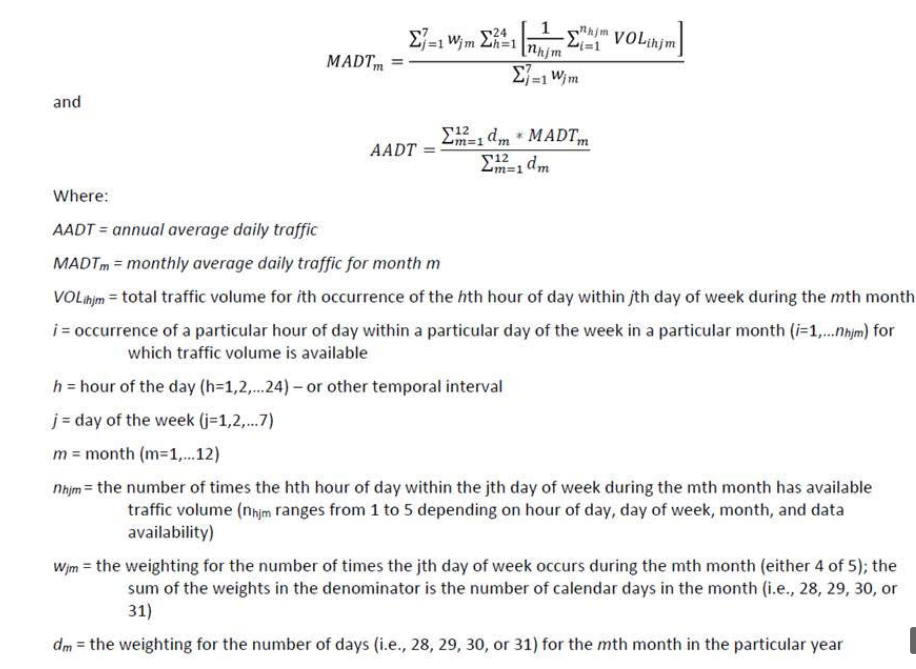

In [30]:
no_of_days_oocured_in_a_week=pd.DataFrame({'no_of_days_occured_in_week':eco_daily_vol1_filter2.groupby(['id','site_name','year','month','week_of_month'])['id'].count()}).reset_index()
# weekly_total_Volume=pd.DataFrame({'weekly_Volume':eco_daily_vol1_filter2.groupby(['id','site_name','year','month','weekno'])['Daily_Volume'].mean()}).reset_index()
no_of_days_oocured_in_a_week.head()

,id,site_name,year,month,week_of_month,no_of_days_occured_in_week
0,100000671,BART AT SPIRE,2019,1,1,7
1,100000671,BART AT SPIRE,2019,1,2,7
2,100000671,BART AT SPIRE,2019,1,3,7
3,100000671,BART AT SPIRE,2019,1,4,7
4,100000671,BART AT SPIRE,2019,1,5,3


In [31]:
# Calculate the weekly volume
weekly_total_Volume=pd.DataFrame({'weekly_total_Volume':eco_daily_vol1_filter2.groupby(['id','site_name','year','month','week_of_month'])['Daily_Volume'].sum()}).reset_index()
Monthly_total_Volume=pd.DataFrame({'MTT':weekly_total_Volume.groupby(['id','site_name','year','month'])['weekly_total_Volume'].sum()}).reset_index()
# Now bring the calender day
Monthly_total_Volume1=pd.merge(Monthly_total_Volume,calender_day1, on=['year','month'], how='inner')
Monthly_total_Volume1['MADBT']=Monthly_total_Volume1['MTT']/Monthly_total_Volume1['days_in_month']
Monthly_total_Volume2=pd.merge(Monthly_total_Volume1,Valid_day_unique, on=['id','year','month'])
Monthly_total_Volume2['weighted_MADBT']=Monthly_total_Volume2['MADBT']*Monthly_total_Volume2['no_of_days_data_collected']
weighted_MADBT_sum=pd.DataFrame({'weighted_MADBT_sum':Monthly_total_Volume2.groupby(['id','site_name','year'])['weighted_MADBT'].sum()}).reset_index()
weighted_days_sum=pd.DataFrame({'weighted_days_sum':Monthly_total_Volume2.groupby(['id','site_name','year'])['no_of_days_data_collected'].sum()}).reset_index()
# Combine these two
aadbt_data=pd.merge(weighted_MADBT_sum,weighted_days_sum, on=['id','site_name','year'], how='inner')
aadbt_data1=aadbt_data.loc[aadbt_data['weighted_days_sum']>=348]
aadbt_data1['AADBT']=aadbt_data1['weighted_MADBT_sum']/aadbt_data1['weighted_days_sum']
# Now all the sites that have missed maximum 5% of the whole year data
aadbt_data1.head()

C:\Users\Md Mintu Miah\AppData\Local\Temp\ipykernel_13944\3683219024.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aadbt_data1['AADBT']=aadbt_data1['weighted_MADBT_sum']/aadbt_data1['weighted_days_sum']


,id,site_name,year,weighted_MADBT_sum,weighted_days_sum,AADBT
0,100000671,BART AT SPIRE,2019,17601.000000,365,48.221918
3,100000671,BART AT SPIRE,2022,18284.258065,364,50.231478
7,100003560,Inland Rail Trail (San Marcos),2019,45855.000000,365,125.630137
8,100003560,Inland Rail Trail (San Marcos),2020,63424.000000,366,173.289617
10,100003560,Inland Rail Trail (San Marcos),2022,64895.032258,364,178.283056


In [35]:
# Save the unique site
uni_bike_site=aadbt_data1.drop_duplicates(subset=['id','site_name'], keep='first')
uni_bike_site.shape
uni_bike_site.to_csv('H:/Desktop/AT Census/D12Analysis/bike_unique_site.csv')

In [36]:
uni_bike_site.shape

(143, 6)

In [37]:
# now read the unique counter with type of device a
dev=pd.read_csv('H:/Desktop/AT Census/D12Analysis/bike_unique_site_type.csv')
dev1=dev.loc[dev['Device_type']!='Citix 3D']
dev1.head()

,Unnamed: 0,id,site_name,year,weighted_MADBT_sum,weighted_days_sum,AADBT,Device_type
0,0,100000671,BART AT SPIRE,2019,17601.00000,365,48.221918,Eco-Combo 2
1,7,100003560,Inland Rail Trail (San Marcos),2019,45855.00000,365,125.630137,Eco-Combo 2
2,11,100003561,Oceanside SLR River Trail EB & WB,2019,202988.00000,365,556.131507,Eco-Combo 2
3,16,100003565,San Diego: Sorrento Valley Rd NB & SB,2019,64164.66667,364,176.276557,Eco-Combo 1
4,18,100003568,San Diego: River Bike Path EB & WB,2019,110677.96890,361,306.587172,Eco-Combo 2


In [38]:
dev2=dev1[['id','site_name']]
dev2.head()

,id,site_name
0,100000671,BART AT SPIRE
1,100003560,Inland Rail Trail (San Marcos)
2,100003561,Oceanside SLR River Trail EB & WB
3,100003565,San Diego: Sorrento Valley Rd NB & SB
4,100003568,San Diego: River Bike Path EB & WB


In [39]:
aadbt_data2=pd.merge(aadbt_data1, dev2, on=['id','site_name'], how='inner')
aadbt_data1.shape, aadbt_data2.shape

((276, 6), (259, 6))

In [40]:
aadbt_data.shape, aadbt_data1.shape,aadbt_data2.shape

((617, 5), (276, 6), (259, 6))

In [41]:
aadbt_data2['AADBT'].describe()

count     259.000000
mean      434.859118
std       508.490915
min         0.000000
25%        97.324877
50%       201.142077
75%       630.745342
max      2972.179546
Name: AADBT, dtype: float64

In [42]:
aadbt_data2.groupby(['year'])['AADBT'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2019,95.0,475.963702,625.130128,0.000000,84.679452,210.448423,633.203598,2972.179546
2020,66.0,424.197180,414.866399,0.000000,115.503415,266.360656,585.459016,1787.081967
2021,57.0,388.441680,414.795786,0.000000,87.457534,192.310531,594.802740,1676.212422
2022,41.0,421.311467,470.487428,6.715881,97.934686,158.079050,689.351294,2168.419000


# Calculate the DOY Factor Using formula DF=Daily Volume/AADBT

In [43]:
# Calculate the DOY
eco_aadbt1=pd.merge(eco_daily_vol1_filter2,aadbt_data2,on=['id','site_name','year'], how='inner' )
eco_aadbt1['DOY']=eco_aadbt1['Daily_Volume']/eco_aadbt1['AADBT']
eco_aadbt1.head()

,id,site_name,year,month,day,weekno,dayofweek,week_of_month,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY
0,100000671,BART AT SPIRE,2019,1,1,1,1,1,101.0,7,2019-01-01,31,28,31,17601.0,365,48.221918,2.094483
1,100000671,BART AT SPIRE,2019,1,2,1,2,1,40.0,7,2019-01-02,31,28,31,17601.0,365,48.221918,0.829498
2,100000671,BART AT SPIRE,2019,1,3,1,3,1,43.0,7,2019-01-03,31,28,31,17601.0,365,48.221918,0.891711
3,100000671,BART AT SPIRE,2019,1,4,1,4,1,45.0,7,2019-01-04,31,28,31,17601.0,365,48.221918,0.933186
4,100000671,BART AT SPIRE,2019,1,5,1,5,1,16.0,7,2019-01-05,31,28,31,17601.0,365,48.221918,0.331799


In [44]:
# Now lets consider only the District 12+11+7 data
doy_factor_d12=pd.merge(static_var,eco_aadbt1, on=['id','site_name'], how='inner')
doy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,Daily_Volume,no_of_days_data_collected_per_week,Date,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,92.0,7,2021-01-01,31,28,31,25607.0,365,70.156164,1.311360
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,95.0,7,2021-01-02,31,28,31,25607.0,365,70.156164,1.354122
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,92.0,7,2021-01-03,31,28,31,25607.0,365,70.156164,1.311360
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,38.0,7,2021-01-04,31,28,31,25607.0,365,70.156164,0.541649
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,49.0,7,2021-01-05,31,28,31,25607.0,365,70.156164,0.698442


In [45]:
# Lets calculate the standard deviation 
doy_factor_d12["Standard Deviation"] = doy_factor_d12.groupby(['id','year'])["DOY"].std().reset_index()["DOY"]
doy_factor_d12['day_of_year'] = doy_factor_d12['Date'].dt.dayofyear
doy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,Date,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY,Standard Deviation,day_of_year
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021-01-01,31,28,31,25607.0,365,70.156164,1.311360,0.319553,1
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021-01-02,31,28,31,25607.0,365,70.156164,1.354122,0.360257,2
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021-01-03,31,28,31,25607.0,365,70.156164,1.311360,0.253628,3
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021-01-04,31,28,31,25607.0,365,70.156164,0.541649,0.494584,4
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021-01-05,31,28,31,25607.0,365,70.156164,0.698442,0.421970,5


In [46]:
# check how many sites survive in each year
doy_factor_d12.groupby(['year'])['id'].nunique()

year
2019    25
2020    14
2021    16
2022    10
Name: id, dtype: int64

In [47]:
# check how many sites survive in each year
doy_factor_d12['id'].nunique()

37

In [48]:
# check the variation of DOY factor
doy_factor_d12.groupby(['year'])['DOY'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2019,9097.0,1.002902,0.407675,0.0,0.759980,0.971991,1.208329,4.798903
2020,5120.0,1.000820,0.454844,0.0,0.695972,0.969007,1.256513,3.015371
2021,5840.0,1.000000,0.424538,0.0,0.727735,0.935370,1.221216,3.473985
2022,3640.0,1.001870,0.368194,0.0,0.771766,0.968608,1.188863,5.062627


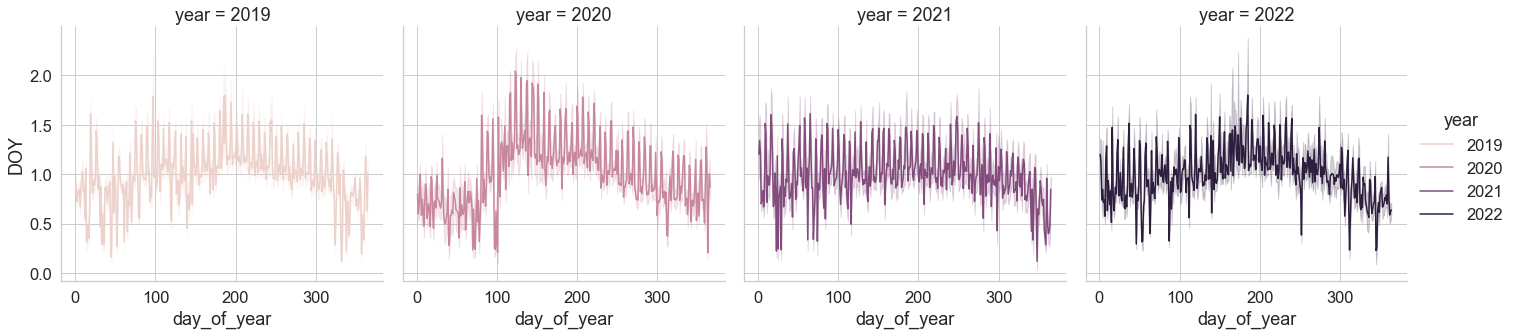

In [50]:
# now plot the DOY for all sites first
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.relplot(
    data=doy_factor_d12, x="day_of_year", y="DOY",
    col="year", hue="year",
    kind="line"
)

In [51]:
doy_factor_d12.groupby(['year'])['id'].nunique()

year
2019    25
2020    14
2021    16
2022    10
Name: id, dtype: int64

In [52]:
doy_factor_d12.groupby(['Bicycle_Fa','year'])['id'].nunique()

Bicycle_Fa   year
Bike Lane    2019     7
             2020     3
             2021     8
             2022     3
Bike Route   2019     1
             2022     2
Cycle Track  2019     1
             2021     1
             2022     1
Path         2019    11
             2020     6
             2021     1
             2022     2
Trail        2019     5
             2020     5
             2021     6
             2022     2
Name: id, dtype: int64

In [53]:
def strata(Bicycle_Fa,distanc_sch_coll_uni,Distance_to_water_area):
    if (distanc_sch_coll_uni<=0.50):
        return 1
    elif ((distanc_sch_coll_uni>0.50) and (Distance_to_water_area<=0.50)):
        return 2
    elif ((Bicycle_Fa=='Bike Lane') and (distanc_sch_coll_uni>0.50) and (Distance_to_water_area>0.50)):
        return 3       
    elif ((Bicycle_Fa=='Trail') and (Bicycle_Fa!='Bike Lane') and (distanc_sch_coll_uni>0.50) and (Distance_to_water_area>0.50)):
        return 4
    elif ((Bicycle_Fa=='Path') and (Bicycle_Fa!='Trail') and (Bicycle_Fa!='Bike Lane') and (distanc_sch_coll_uni>0.50) and (Distance_to_water_area>0.50)):
        return 5
    else: 
        return 6

In [54]:
# Apply the strata function to classify the sites by strata
doy_factor_d12['Strata']=doy_factor_d12.apply(lambda row:strata(row['Bicycle_Fa'],row['distanc_sch_coll_uni'],row['Distance_to_water_area']), axis=1)
doy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,days_in_month,maximum_days_in_a_month_allowed,no_of_days_data_collected,weighted_MADBT_sum,weighted_days_sum,AADBT,DOY,Standard Deviation,day_of_year,Strata
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,25607.0,365,70.156164,1.311360,0.319553,1,4
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,25607.0,365,70.156164,1.354122,0.360257,2,4
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,25607.0,365,70.156164,1.311360,0.253628,3,4
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,25607.0,365,70.156164,0.541649,0.494584,4,4
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,31,28,31,25607.0,365,70.156164,0.698442,0.421970,5,4


In [55]:
doy_factor_d12.columns

Index(['id', 'serial_num', 'user_type', 'domain', 'site_name', 'lat', 'long',
       'bike_true', 'bike_ped_t', 'DISTRICT', 'Region', 'Shape_Leng',
       'Bicycle_Fa', 'geometry', 'min_dist_to_CBD', 'Commercial Area ',
       'Distance to commercial area', 'retail Area ',
       'Distance to retail area', 'industrial Area ',
       'Distance to industrial area', 'residential Area ',
       'Distance to residential area', 'grass Area ', 'Distance to grass area',
       'forest Area ', 'Distance to forest area', 'education Area ',
       'Distance to education area', 'institutional Area ',
       'Distance to institutional area', 'water Area ',
       'Distance_to_water_area', 'park Area ', 'Distance to Park Center',
       'School', 'min_dist_to_school', 'college', 'min_dist_to_college',
       'University', 'min_dist_to_university', 'distanc_sch_coll_uni', 'year',
       'month', 'day', 'weekno', 'dayofweek', 'week_of_month', 'Daily_Volume',
       'no_of_days_data_collected_per_week'

In [56]:
# keep this site for later use
static_qc=doy_factor_d12[['id','site_name','year','Bicycle_Fa','Distance_to_water_area','distanc_sch_coll_uni']]
static_qc=static_qc.drop_duplicates(subset=['id','site_name','year'], keep='first')
static_qc.shape

(65, 6)

In [57]:
doy_factor_d12.groupby(['Strata','year'])['id'].nunique()

Strata  year
1       2019    11
        2020     7
        2021     8
        2022     8
2       2019     7
        2020     2
        2021     3
3       2019     1
        2020     1
        2021     2
        2022     1
4       2020     2
        2021     3
        2022     1
5       2019     6
        2020     2
Name: id, dtype: int64

In [58]:
doy_factor_d12['Strata'].describe()

count    23697.000000
mean         2.106765
std          1.436771
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          5.000000
Name: Strata, dtype: float64

In [59]:
doy_factor_d12.groupby(['Strata'])['id'].nunique()

Strata
1    18
2     8
3     2
4     3
5     6
Name: id, dtype: int64

# University Strata

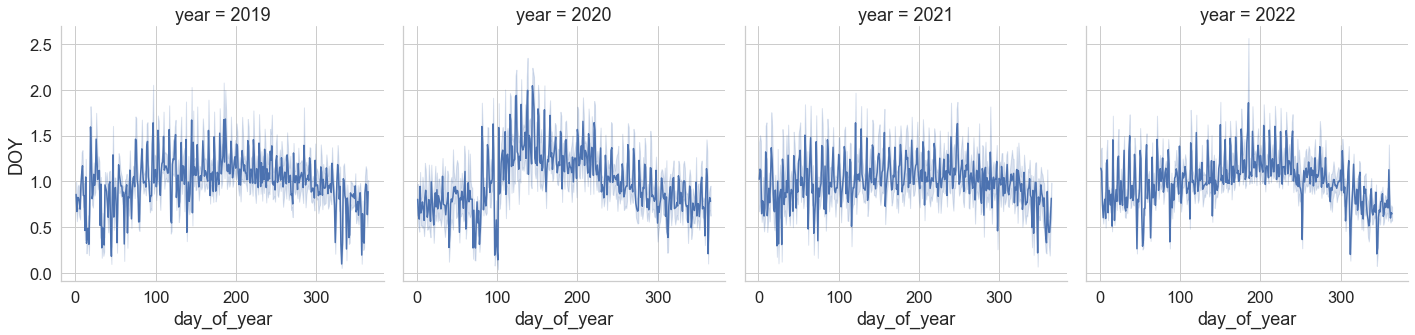

In [65]:
# now plot the DOY for all sites first
sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==1], x="day_of_year", y="DOY",
    col="year", 
    kind="line"
)

# Waterbody Strata

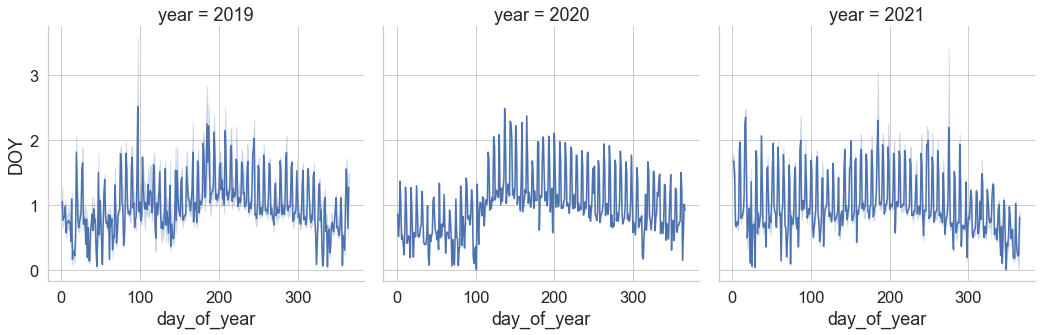

In [64]:
# now plot the DOY for all sites first
sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==2], x="day_of_year", y="DOY",
    col="year", 
    kind="line"
)

# Bike Lane Strata

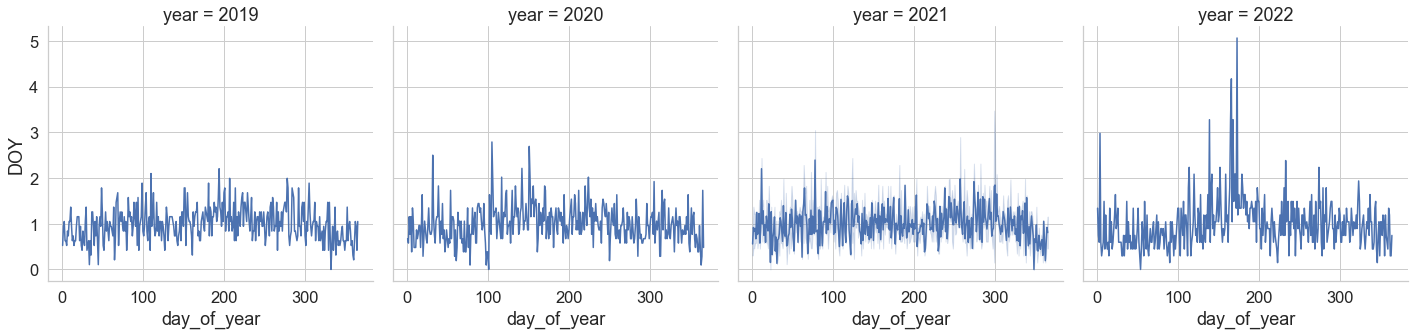

In [63]:
# now plot the DOY for all sites first
sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==3], x="day_of_year", y="DOY",
    col="year", 
    kind="line"
)

# Trail Strata

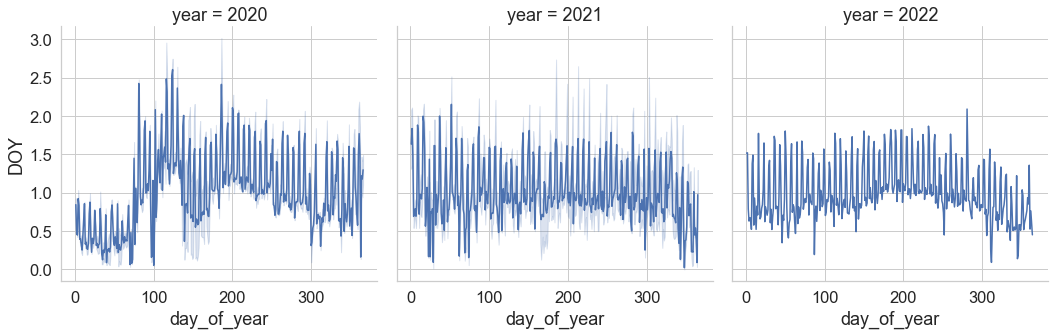

In [67]:
# now plot the DOY for all sites first
sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==4], x="day_of_year", y="DOY",
    col="year",
    kind="line"
)

# Path Strata

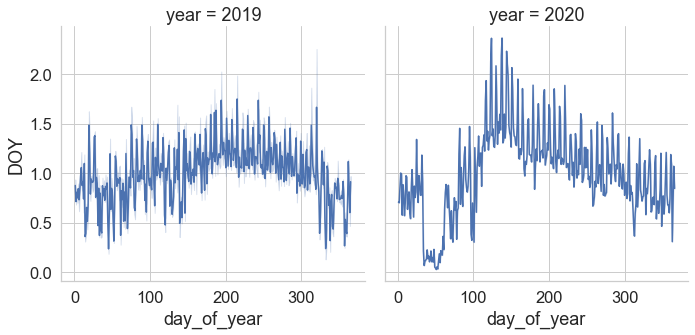

In [68]:
# now plot the DOY for all sites first
sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==5], x="day_of_year", y="DOY",
    col="year",
    kind="line"
)

# Others( Bike Route, Cycycle Track and Unknown)

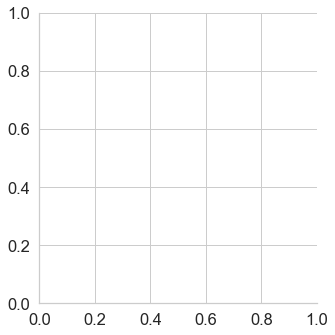

In [69]:
# now plot the DOY for all sites first
sns.relplot(
    data=doy_factor_d12.loc[doy_factor_d12['Strata']==6], x="day_of_year", y="DOY",
    col="year", hue="year",
    kind="line"
)

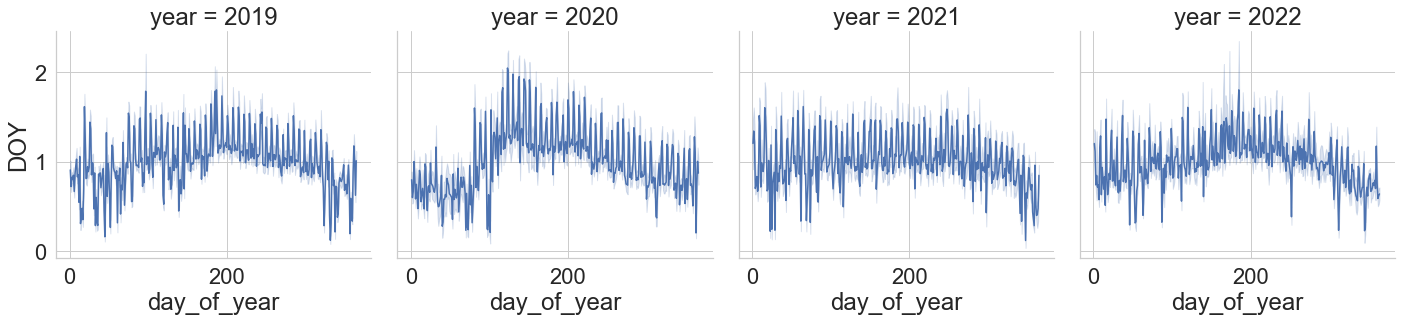

In [105]:
# now plot the DOY for all sites first
sns.relplot(
    data=doy_factor_d12, x="day_of_year", y="DOY",
    col="year",
    kind="line"
)

# Create Urban and Rural Strata

In [71]:
# read the urban shape file
# urban=gpd.read_file('H:/Desktop/Bicycle Connectivity Project/Project-Bicycle Connectivity/stanford-urban.json')
# urban.head()

In [72]:
# urban2=urban.to_crs(epsg=7131)
# urban2.head()

In [73]:
# set the geometry for the file
# doy_factor_d12_ns=doy_factor_d12.drop(['geometry'],axis=1)
# gdf_doy = gpd.GeoDataFrame(
#    doy_factor_d12_ns, geometry=gpd.points_from_xy(doy_factor_d12_ns.long, doy_factor_d12_ns.lat), crs="EPSG:4326"
# )
# doy_factor_d12_ru1=gdf_doy.to_crs(epsg=7131)
# doy_factor_d12_ru1.head()

In [74]:
# get the urban area node connectivity 
# urban_counters=gpd.clip(doy_factor_d12_ru1,urban2)
# # Now get the rural areas
# rural_counters = doy_factor_d12_ru1.overlay(urban_counters, how='difference')
# rural_counters.shape,urban_counters.shape 

In [75]:
# As none of the counters located in rural region, therefore urban and rural stratification is not possible for D-12, 11 and 7

# Calculate the DOW Factor using the Formula= Average Volume of a Particular day/ Average Total Weekly Volume

In [76]:
average_weekly_Volume=pd.DataFrame({'weekly_average_Volume':eco_daily_vol1_filter2.groupby(['id','site_name','year','dayofweek'])['Daily_Volume'].mean()}).reset_index()
average_weekly_Volume.head(10)

,id,site_name,year,dayofweek,weekly_average_Volume
0,100000671,BART AT SPIRE,2019,0,37.980769
1,100000671,BART AT SPIRE,2019,1,43.415094
2,100000671,BART AT SPIRE,2019,2,36.653846
3,100000671,BART AT SPIRE,2019,3,44.288462
4,100000671,BART AT SPIRE,2019,4,44.769231
5,100000671,BART AT SPIRE,2019,5,62.076923
6,100000671,BART AT SPIRE,2019,6,68.461538
7,100000671,BART AT SPIRE,2020,0,67.800000
8,100000671,BART AT SPIRE,2020,1,84.705882
9,100000671,BART AT SPIRE,2020,2,79.742857


In [77]:
total_weekly_Volume=pd.DataFrame({'weekly_total_Volume':average_weekly_Volume.groupby(['id','site_name','year'])['weekly_average_Volume'].sum()}).reset_index()
total_weekly_Volume.head()

,id,site_name,year,weekly_total_Volume
0,100000671,BART AT SPIRE,2019,337.645864
1,100000671,BART AT SPIRE,2020,611.134454
2,100000671,BART AT SPIRE,2021,332.721631
3,100000671,BART AT SPIRE,2022,352.153846
4,100002695,LIWH: Serrano Trail (Gate 5),2019,2512.157505


In [78]:
dow_factor=pd.merge(average_weekly_Volume,total_weekly_Volume, on=['id','site_name','year'], how='inner' )
dow_factor['DOWF']=dow_factor['weekly_average_Volume']/dow_factor['weekly_total_Volume']
dow_factor.head()

,id,site_name,year,dayofweek,weekly_average_Volume,weekly_total_Volume,DOWF
0,100000671,BART AT SPIRE,2019,0,37.980769,337.645864,0.112487
1,100000671,BART AT SPIRE,2019,1,43.415094,337.645864,0.128582
2,100000671,BART AT SPIRE,2019,2,36.653846,337.645864,0.108557
3,100000671,BART AT SPIRE,2019,3,44.288462,337.645864,0.131168
4,100000671,BART AT SPIRE,2019,4,44.769231,337.645864,0.132592


In [79]:
dow_factor.groupby(['id','year'])['DOWF'].sum()

id         year
100000671  2019    1.0
           2020    1.0
           2021    1.0
           2022    1.0
100002695  2019    1.0
                  ... 
300025695  2021    1.0
           2022    1.0
300026847  2022    1.0
300026848  2022    1.0
300032304  2022    1.0
Name: DOWF, Length: 617, dtype: float64

In [80]:
# now combine with static data
dow_factor4=pd.merge(static_qc,dow_factor, on=['id','site_name','year'], how='inner')
dow_factor4.head()

,id,site_name,year,Bicycle_Fa,Distance_to_water_area,distanc_sch_coll_uni,dayofweek,weekly_average_Volume,weekly_total_Volume,DOWF
0,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,0,53.461538,491.320755,0.108812
1,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,1,63.461538,491.320755,0.129165
2,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,2,68.596154,491.320755,0.139616
3,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,3,57.865385,491.320755,0.117775
4,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,4,58.320755,491.320755,0.118702


In [81]:
# Stratified now
dow_factor4['Strata']=dow_factor4.apply(lambda row:strata(row['Bicycle_Fa'],row['distanc_sch_coll_uni'],row['Distance_to_water_area']), axis=1)
dow_factor4.head()

,id,site_name,year,Bicycle_Fa,Distance_to_water_area,distanc_sch_coll_uni,dayofweek,weekly_average_Volume,weekly_total_Volume,DOWF,Strata
0,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,0,53.461538,491.320755,0.108812,4
1,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,1,63.461538,491.320755,0.129165,4
2,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,2,68.596154,491.320755,0.139616,4
3,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,3,57.865385,491.320755,0.117775,4
4,100013426,Serrano Creek at Dimension,2021,Trail,0.720633,1.221488,4,58.320755,491.320755,0.118702,4


In [82]:
# check how many sites survive in each year
dow_factor4.groupby(['year'])['id'].nunique()

year
2019    25
2020    14
2021    16
2022    10
Name: id, dtype: int64

<AxesSubplot:xlabel='dayofweek', ylabel='DOWF'>

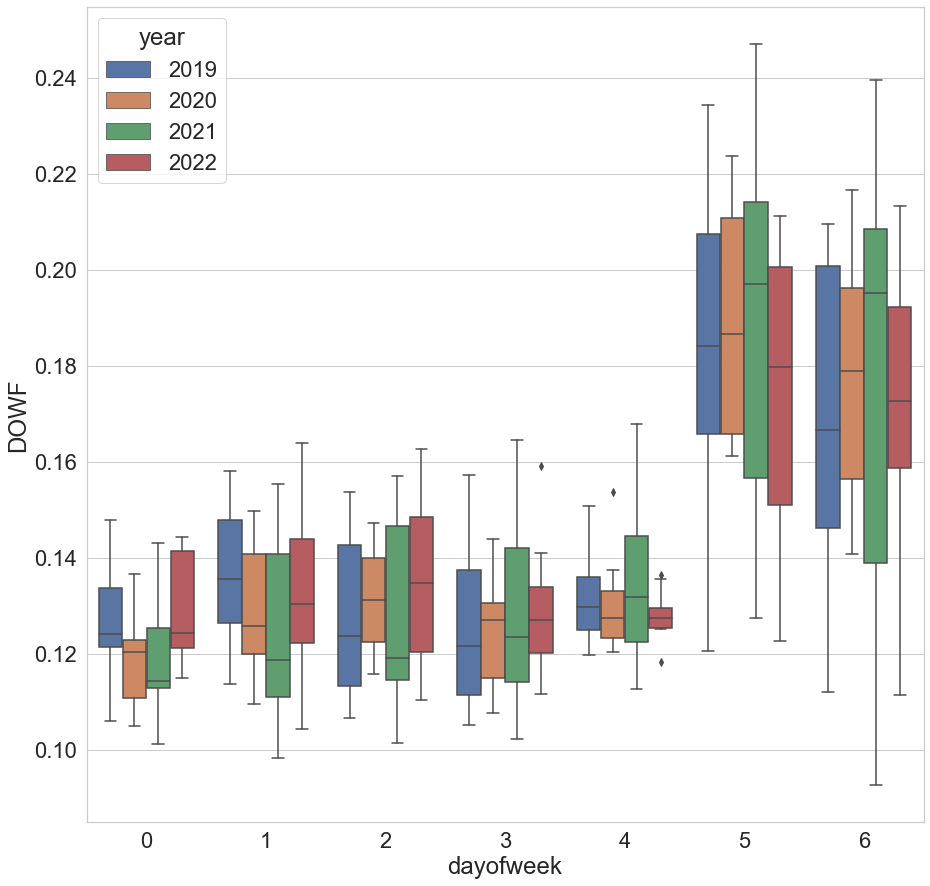

In [83]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=dow_factor4,  x="dayofweek", y="DOWF",
     hue="year")

<AxesSubplot:xlabel='dayofweek', ylabel='DOWF'>

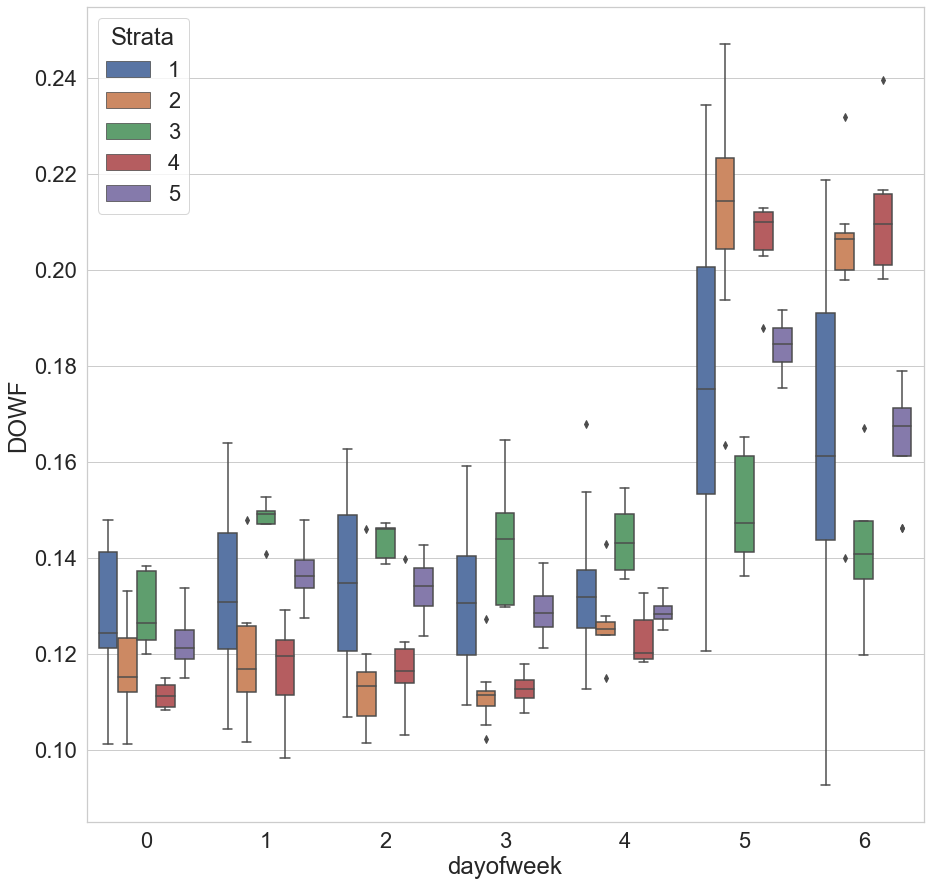

In [84]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=dow_factor4,  x="dayofweek", y="DOWF",
     hue="Strata")

# Calculate the MOY Factor

In [86]:
moy_f=pd.merge(Monthly_total_Volume1,aadbt_data2, on=['id','site_name','year'], how='inner')
moy_f['MOYF']=moy_f['MADBT']/moy_f['AADBT']
moy_f.head()

,id,site_name,year,month,MTT,days_in_month,MADBT,weighted_MADBT_sum,weighted_days_sum,AADBT,MOYF
0,100000671,BART AT SPIRE,2019,1,1233.0,31,39.774194,17601.0,365,48.221918,0.824816
1,100000671,BART AT SPIRE,2019,2,917.0,28,32.750000,17601.0,365,48.221918,0.679152
2,100000671,BART AT SPIRE,2019,3,1327.0,31,42.806452,17601.0,365,48.221918,0.887697
3,100000671,BART AT SPIRE,2019,4,1709.0,30,56.966667,17601.0,365,48.221918,1.181344
4,100000671,BART AT SPIRE,2019,5,1902.0,31,61.354839,17601.0,365,48.221918,1.272343


<AxesSubplot:xlabel='month', ylabel='MOYF'>

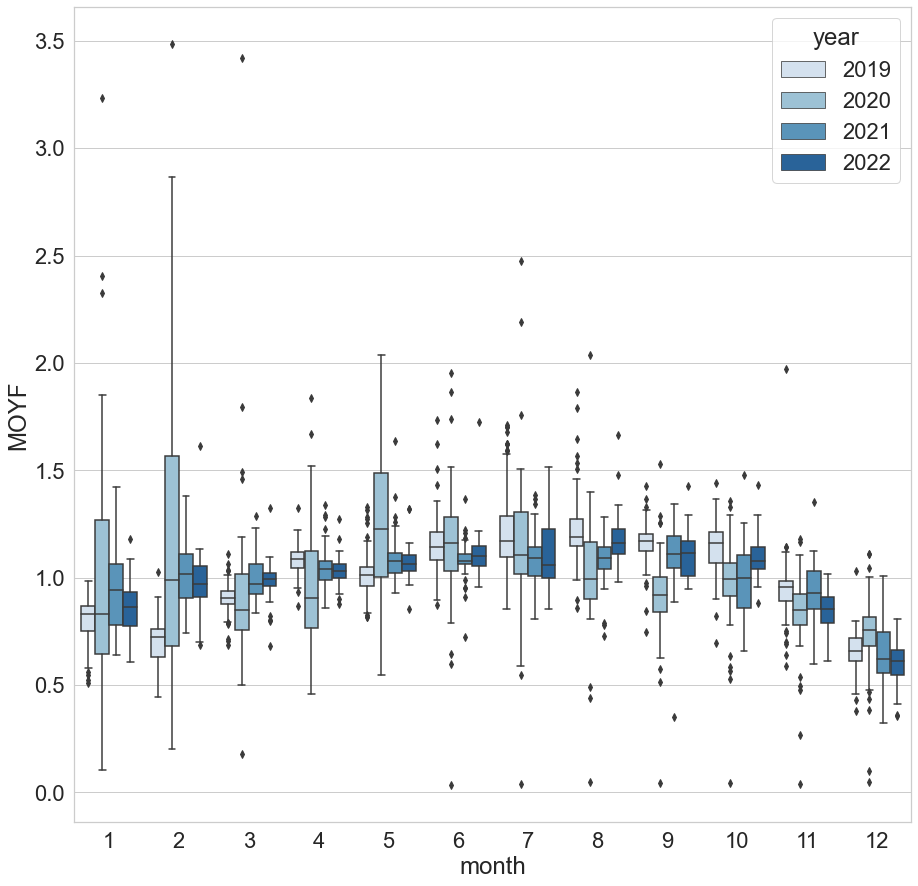

In [87]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_f,  x="month", y="MOYF",
     hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

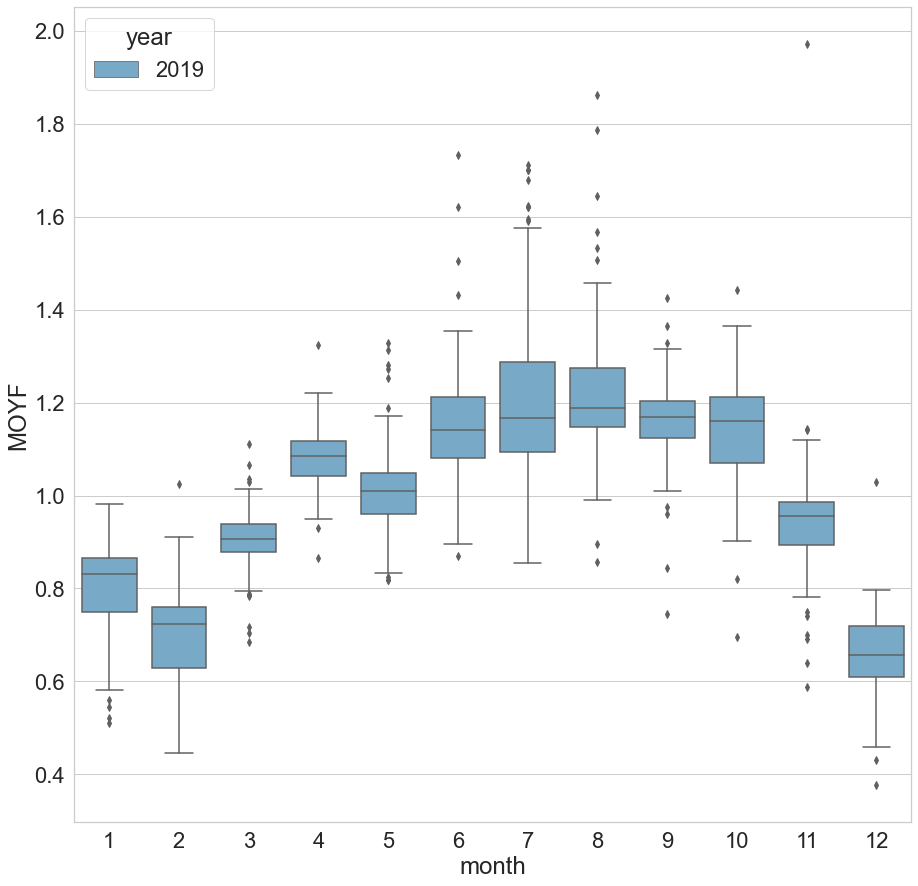

In [88]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_f.loc[moy_f['year']==2019],  x="month", y="MOYF",
     hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

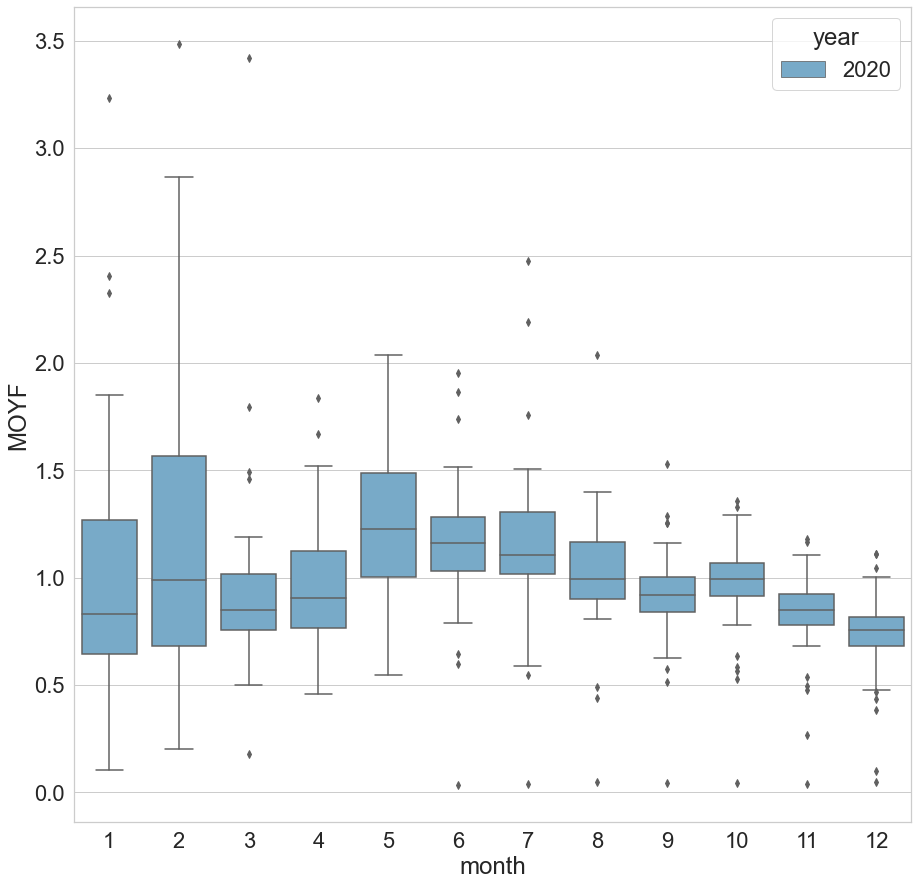

In [89]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_f.loc[moy_f['year']==2020],  x="month", y="MOYF",
     hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

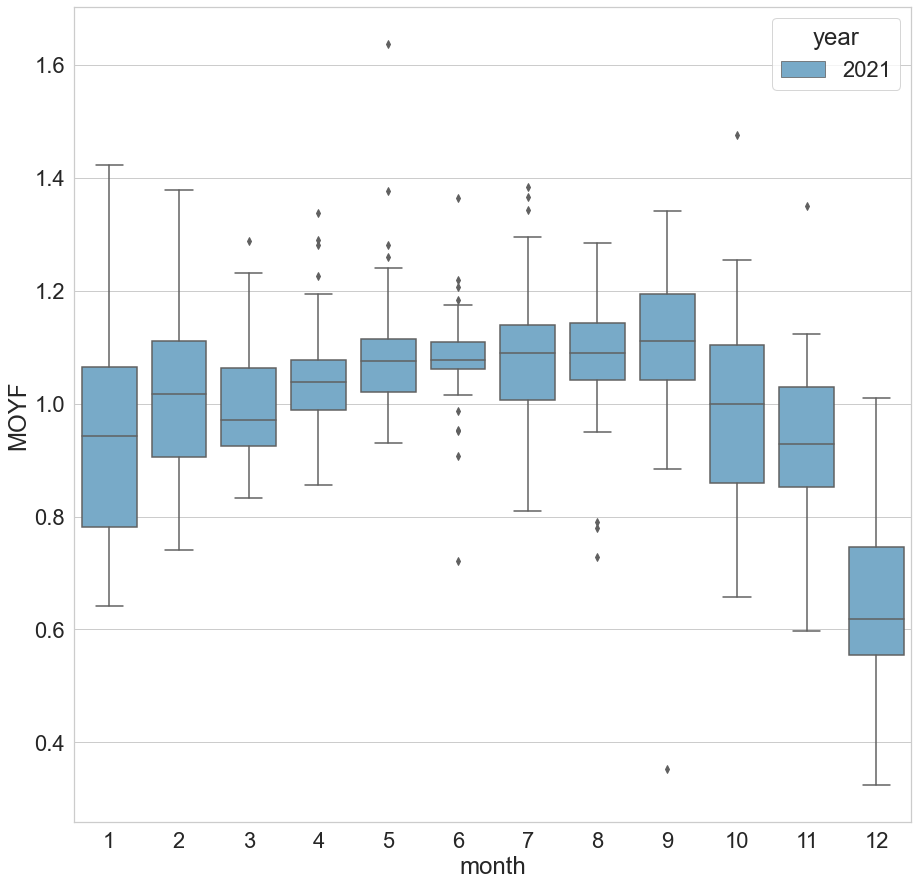

In [90]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_f.loc[moy_f['year']==2021],  x="month", y="MOYF",
     hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

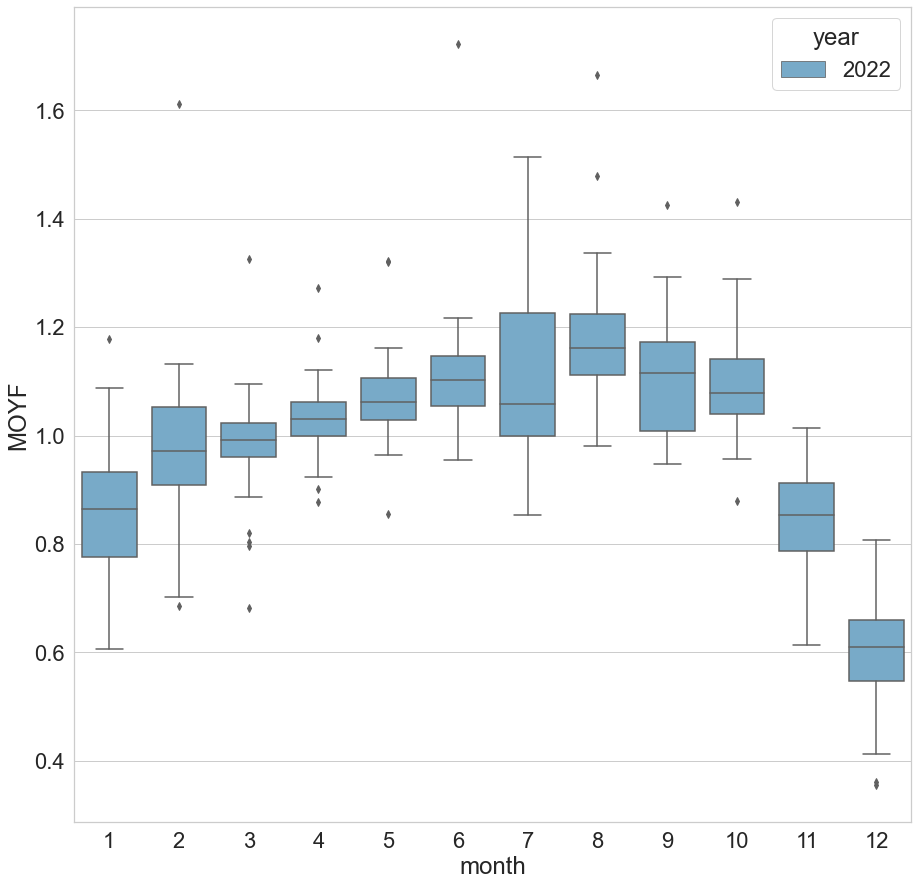

In [91]:
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_f.loc[moy_f['year']==2022],  x="month", y="MOYF",
     hue="year",palette="Blues")

In [92]:
# Now apply the Strata
moy_factor_d12=pd.merge(static_var,moy_f, on=['id','site_name'], how='inner')
moy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,distanc_sch_coll_uni,year,month,MTT,days_in_month,MADBT,weighted_MADBT_sum,weighted_days_sum,AADBT,MOYF
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2021,2,2100.0,28,75.000000,25607.0,365,70.156164,1.069044
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2021,3,2046.0,31,66.000000,25607.0,365,70.156164,0.940758
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2021,4,2122.0,30,70.733333,25607.0,365,70.156164,1.008227
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2021,5,2363.0,31,76.225806,25607.0,365,70.156164,1.086516
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,1.221488,2021,6,1518.0,30,50.600000,25607.0,365,70.156164,0.721248


In [93]:
# Stratified now
moy_factor_d12['Strata']=moy_factor_d12.apply(lambda row:strata(row['Bicycle_Fa'],row['distanc_sch_coll_uni'],row['Distance_to_water_area']), axis=1)
moy_factor_d12.head()

,id,serial_num,user_type,domain,site_name,lat,long,bike_true,bike_ped_t,DISTRICT,...,year,month,MTT,days_in_month,MADBT,weighted_MADBT_sum,weighted_days_sum,AADBT,MOYF,Strata
0,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021,2,2100.0,28,75.000000,25607.0,365,70.156164,1.069044,4
1,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021,3,2046.0,31,66.000000,25607.0,365,70.156164,0.940758,4
2,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021,4,2122.0,30,70.733333,25607.0,365,70.156164,1.008227,4
3,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021,5,2363.0,31,76.225806,25607.0,365,70.156164,1.086516,4
4,100013426,X2G14045503,['bicycle' 'horse' 'pedestrian'],OC Parks,Serrano Creek at Dimension,33.662563,-117.67261,1,1,12,...,2021,6,1518.0,30,50.600000,25607.0,365,70.156164,0.721248,4


In [94]:
moy_factor_d12.groupby(['year','Strata'])['id'].nunique()

year  Strata
2019  1         11
      2          7
      3          1
      5          6
2020  1          7
      2          2
      3          1
      4          2
      5          2
2021  1          8
      2          3
      3          2
      4          3
2022  1          8
      3          1
      4          1
Name: id, dtype: int64

<AxesSubplot:xlabel='month', ylabel='MOYF'>

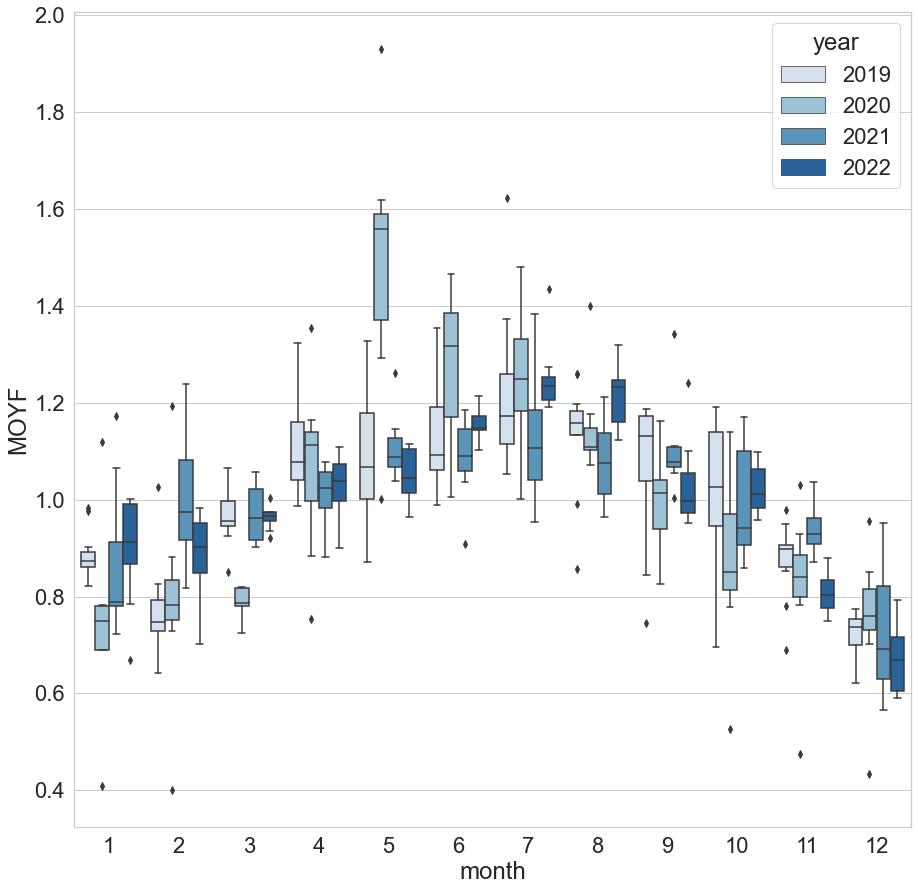

In [95]:
# University Strata
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
# sns.boxplot(data=moy_factor_d12[(moy_factor_d12.year==2019)&(moy_factor_d12.Strata==1)],  x="month", y="MOYF",
#      hue="year",palette="Blues")
sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==1],  x="month", y="MOYF",
      hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

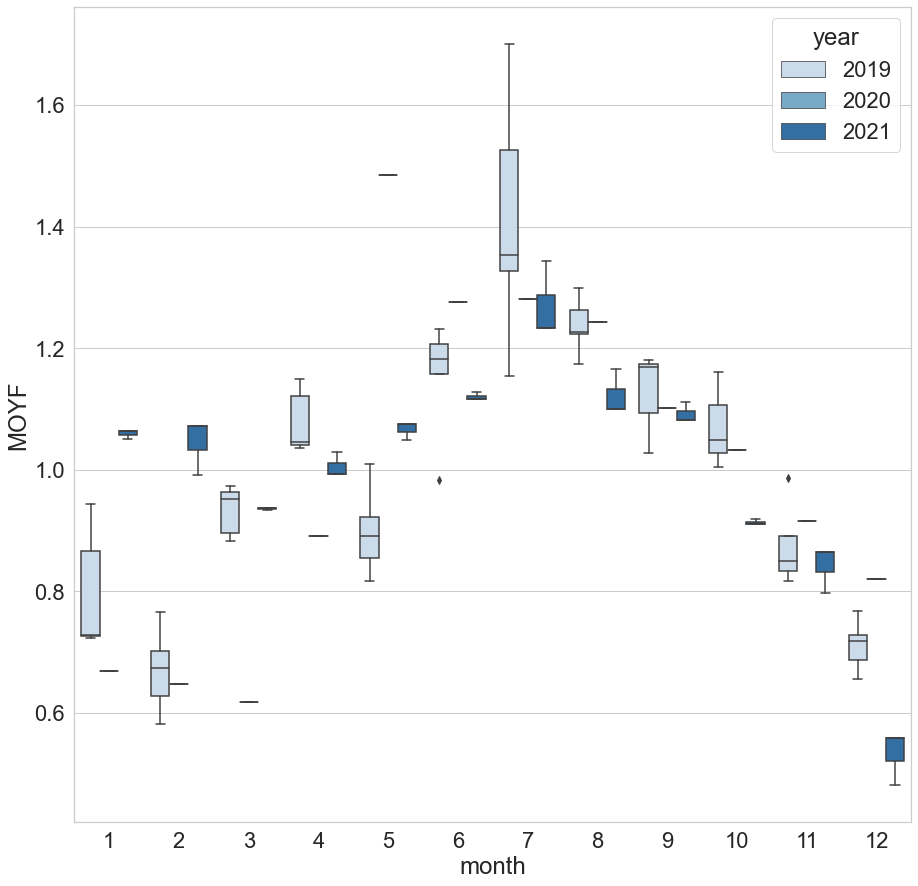

In [96]:
# water Body Strata
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==2],  x="month", y="MOYF",
      hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

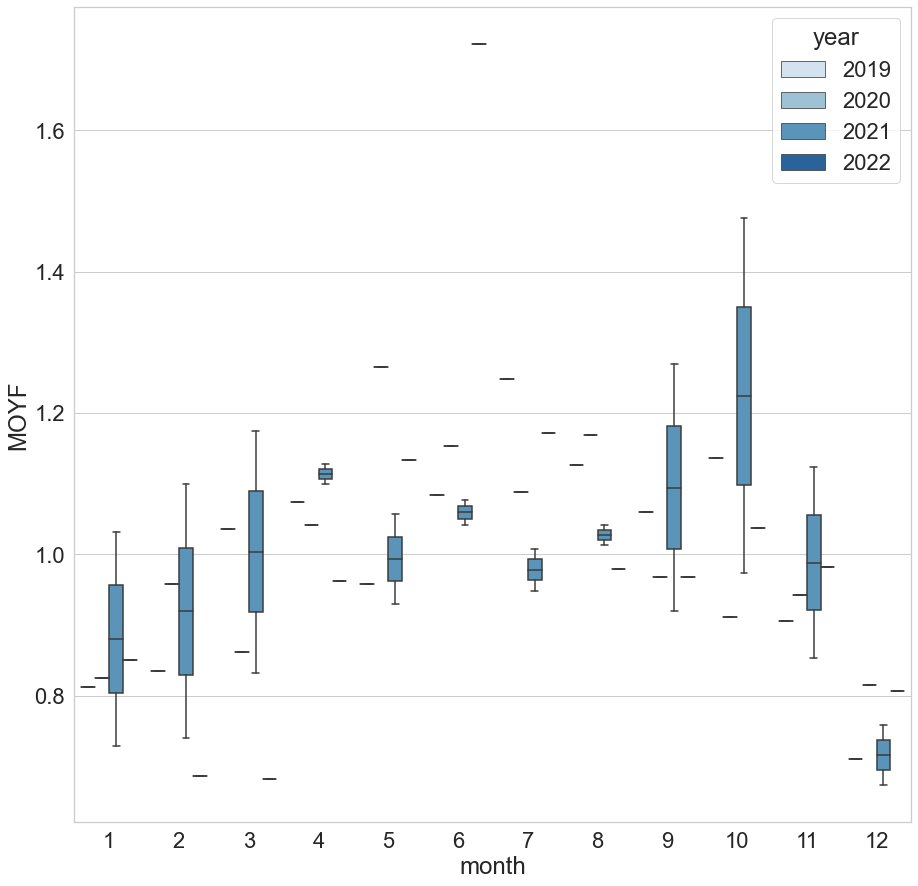

In [97]:
# water Bike lane Strata
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==3],  x="month", y="MOYF",
      hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

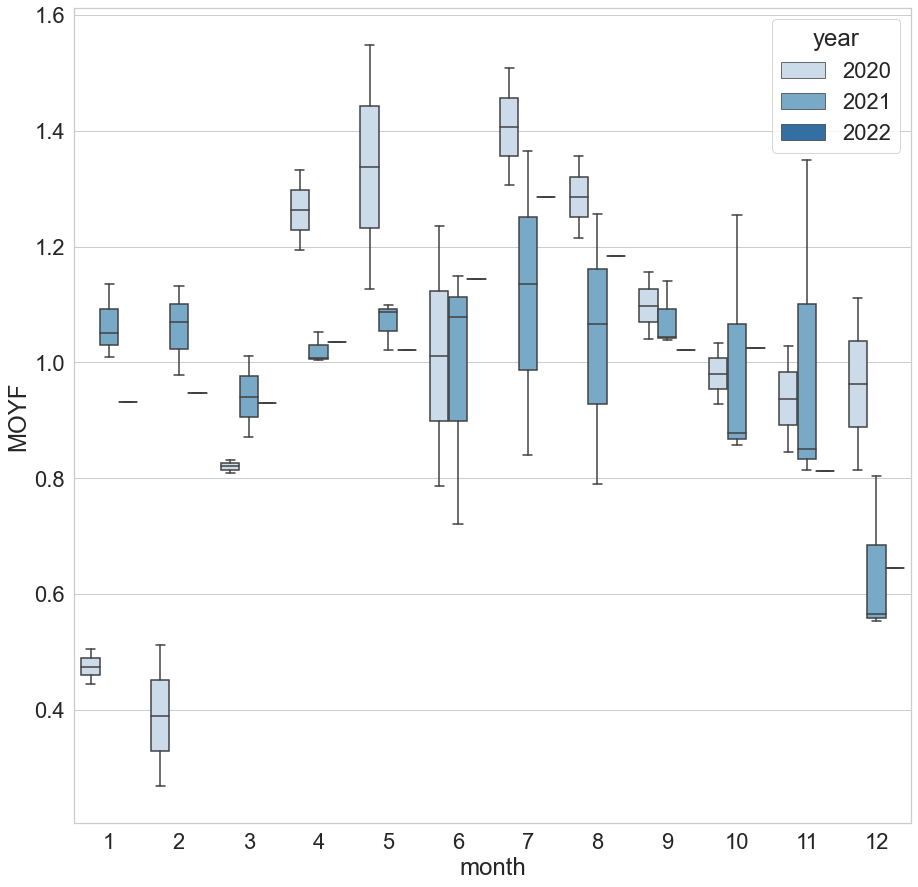

In [98]:
# Trail Strata
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==4],  x="month", y="MOYF",
      hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

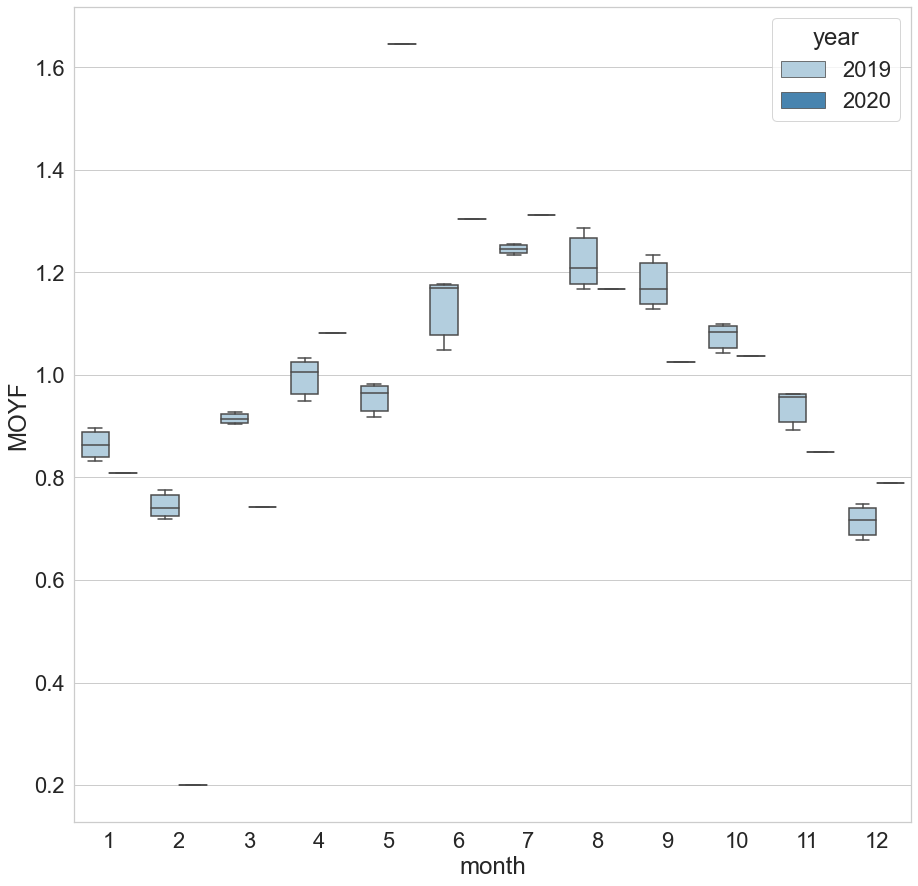

In [99]:
# water Path Strata
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_factor_d12.loc[moy_factor_d12['Strata']==5],  x="month", y="MOYF",
      hue="year",palette="Blues")

<AxesSubplot:xlabel='month', ylabel='MOYF'>

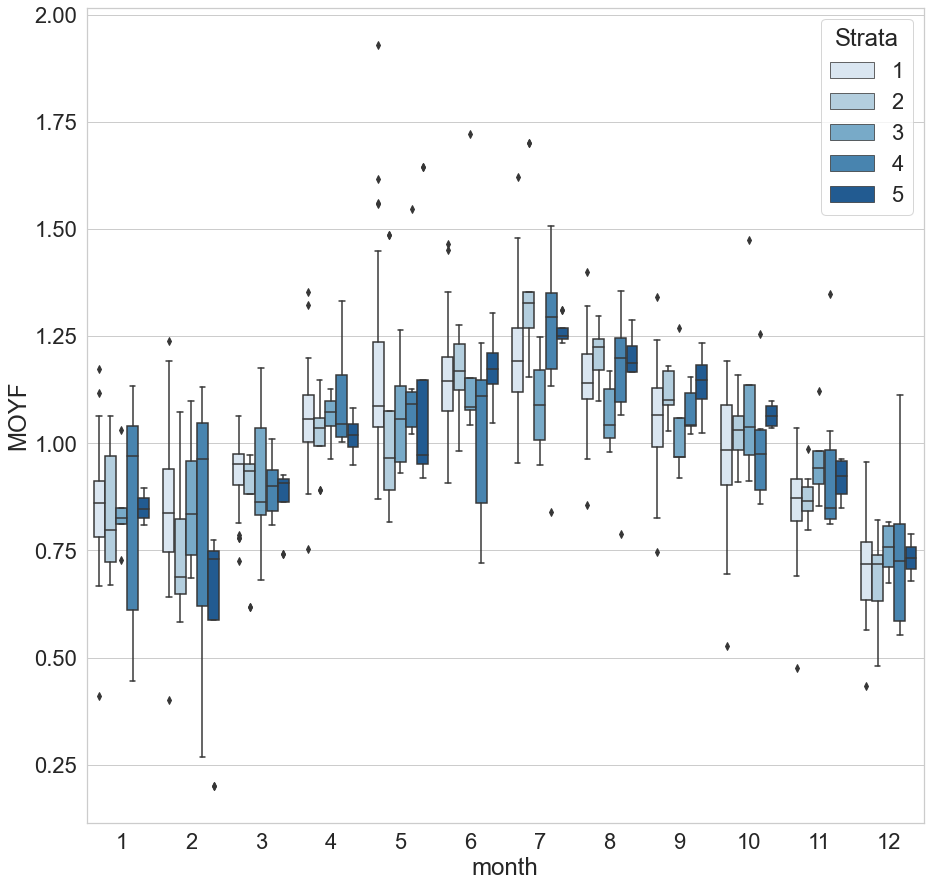

In [101]:
# plot all
plt.figure(figsize=(15,15))
sns.set_theme(style="whitegrid", font_scale=2.0)
sns.boxplot(data=moy_factor_d12,  x="month", y="MOYF",
      hue="Strata",palette="Blues")

In [102]:
moy_factor_d12_unique=moy_factor_d12.drop_duplicates(subset=['id','site_name','year'])
moy_factor_d12_unique.shape

(65, 52)

In [103]:
# Export the geosjon file and visualize
# Import the node Connectivity
moy_factor_d12_unique.to_csv("C:/UC Berkeley Project Backup/AT Census/D12Analysis/strata_bike_file.csv")

In [104]:
# Calculate the average MOY factor for each Strata
averge_moyf=pd.DataFrame({'Average_MOYF':moy_factor_d12.groupby(['Strata','month','year'])['MOYF'].mean()}).reset_index()
averge_moyf

,Strata,month,year,Average_MOYF
0,1,1,2019,0.886714
1,1,1,2020,0.745920
2,1,1,2021,0.869513
3,1,1,2022,0.894813
4,1,2,2019,0.772003
...,...,...,...,...
187,5,10,2020,1.036532
188,5,11,2019,0.937701
189,5,11,2020,0.848997
190,5,12,2019,0.714534


# end of the code